In [1]:
import pandas as pd
print(pd. __version__)
from sklearn.utils import shuffle

df = pd.read_pickle('https://pandora.infn.it/public/296f0d/dl/dataset_pol_vbs_full2018v9_VBS_WW_2j_emu_dnn_SigBkg.pkl')
pd.set_option('display.max_columns', None)

df['notLL'] = df['isTT'] + df['isMIX']
df['notTT'] = df['isLL'] + df['isMIX']

df_SvB = df[((df['isTT'] + df['isMIX'] + df['isLL']) == 0) & ((df['isVBS'] + df['isBKG']) == 1)]
df_SvB

1.3.5


,CleanJet_eta_1,CleanJet_eta_2,CleanJet_phi_1,CleanJet_phi_2,CleanJet_pt_1,CleanJet_pt_2,Lepton_eta_1,Lepton_eta_2,Lepton_phi_1,Lepton_phi_2,Lepton_pt_1,Lepton_pt_2,Rpt,Zepp_l1,Zepp_l2,Zepp_ll,detajj,detall,dphijj,dphilep1jet1,dphilep1jet2,dphilep1jj,dphilep2jet1,dphilep2jet2,dphilep2jj,dphill,dphilljet,dphilljetjet,dphillmet,dphilmet1,dphilmet2,dr_l1j1,dr_l1j2,dr_l2j1,dr_l2j2,drll,ht,m2ljj30,mT2,mTi,m_l1j1,m_l1j2,m_l2j1,m_l2j2,mcoll,mcollWW,mjj,mll,mtw1,mtw2,phi_miss,proxyW_l1,proxyW_l2,pt_miss,ptll,recoil,yll,isLL,isMIX,isTT,isBKG,isVBS,notLL,notTT
0,-2.066406,2.819824,0.798096,1.402344,58.501850,40.687500,0.052612,1.257812,-1.661133,-1.083984,59.333496,24.431036,0.608992,-0.324097,0.881104,0.278503,4.886230,1.205200,0.604248,2.459229,3.063477,2.705436,1.882080,2.486328,2.128288,0.577148,2.293723,2.539931,1.459033,1.293528,1.870677,3.246235,4.128238,3.820034,2.936275,1.336266,238.785126,663.045654,54.077595,116.856529,186.453583,208.308685,201.729980,80.825615,34.081371,172.575851,558.146729,53.316471,69.366989,59.446663,-2.954661,69.433067,77.407051,55.831234,80.912895,103.303886,0.426776,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.962158,2.097168,-2.888672,2.117188,149.991165,35.933941,-0.200928,-0.043259,-0.064484,-1.243164,77.783211,56.874996,0.820799,-0.268433,-0.110764,0.189598,4.059326,0.157669,1.277326,2.824188,2.181671,3.035455,1.645508,2.922834,1.856775,1.178680,2.338290,2.549557,1.280928,0.795030,1.973710,3.328359,3.168743,2.527819,3.984142,1.189179,424.800110,722.115173,36.402397,165.162811,303.863617,177.457932,246.787781,147.545578,55.163944,198.715286,556.838928,74.678581,69.710251,128.463547,0.730546,72.027008,128.506714,104.216820,112.543976,173.874069,-0.134309,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-2.612305,4.087891,2.516113,-0.967896,40.722610,32.580414,0.271790,0.554932,1.902100,-0.195648,49.380596,26.431454,0.983751,-0.466003,-0.182861,0.324432,6.700195,0.283142,2.799176,0.614014,2.869995,1.442570,2.711761,0.772247,2.742868,2.097748,1.178385,2.006942,2.991255,2.727559,1.457879,2.948731,4.774882,4.169537,3.616374,2.116770,188.852966,1117.925415,90.210190,117.845978,181.257996,276.182312,166.170395,168.286209,35.217129,165.960342,1039.650757,63.470570,86.703613,43.173630,-1.653527,87.540642,46.859325,39.737881,42.711731,6.865315,0.370764,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-3.061035,2.718262,0.276855,-0.745605,106.404816,72.261391,0.998047,1.562744,-2.758789,3.061523,86.100220,55.490475,0.621377,1.169434,1.734131,1.451782,5.779297,0.564697,1.022461,3.035645,2.013184,2.631210,2.784668,2.476056,3.094082,0.462873,3.067006,2.811744,0.937767,1.118302,0.655429,5.068657,2.648027,5.397565,3.978624,0.730160,409.368164,1925.205200,53.180969,155.018036,741.145020,203.489059,782.901184,143.249649,77.403580,180.723633,1574.967773,50.694679,74.129723,36.110657,2.406095,103.805618,103.368439,56.702801,137.994324,177.526398,1.220858,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.772705,2.803223,-0.822388,2.676758,202.039673,69.501266,1.101318,1.426025,2.102539,-3.007812,67.372704,38.399914,0.184240,0.586060,0.910767,0.748413,4.575928,0.324707,2.784040,2.924927,0.574219,3.100728,2.185425,0.598615,2.009624,1.172834,2.951855,2.776054,1.125174,0.718771,1.891605,4.100635,1.796164,3.874011,5.849018,1.216953,484.852448,1374.014404,44.040474,193.714752,518.392822,137.338638,446.848633,83.816788,29.771696,226.051010,1179.432251,58.687038,59.872330,104.227180,1.383768,115.313995,144.166290,107.538918,89.548050,166.987473,1.219559,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83461,-2.250977,2.995605,-1.189941,2.155273,51.149643,30.781250,1.046387,0.910767,2.294434,-1.092285,89.732719,46.114021,2.628179,0.674072,0.538452,0.606262,5.246582,0.135620,2.937970,2.798810,0.139160,2.510710,0.097656,3.035627,0.385756,2.896466,2.555054,2.266

In [2]:
import math
import numpy as np
import tensorflow as tf

In [3]:
import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Activation, Dense, Dropout, InputLayer
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import initializers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import copy
print(tf.__version__)
from tensorflow.python.client import device_lib
tf.config.run_functions_eagerly(True)

2.7.0-rc1


In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

nclasses = 2
features = df.columns[:len(df.columns)-7]

NDIM = len(features)
print(NDIM)
for col in df.columns:
    df[col]    = np.hstack(df[col])
'''
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df = shuffle(df)
'''
# Perform the splitting and define training and validation datasets
msk    = np.random.rand(len(df_SvB)) < 0.8

df_train    = df_SvB[msk]
df_val      = df_SvB[~msk]

X    = df_train.values[:,0:NDIM]
Y    = df_train[['isVBS', 'isBKG']].values
X_val = df_val.values[:,0:NDIM]
Y_val = df_val[['isVBS', 'isBKG']].values

print(X,Y)

57
[[-2.06640625e+00  2.81982422e+00  7.98095703e-01 ...  8.09128952e+01
   1.03303886e+02  4.26775962e-01]
 [-1.96215820e+00  2.09716797e+00 -2.88867188e+00 ...  1.12543976e+02
   1.73874069e+02 -1.34309053e-01]
 [ 3.86865234e+00 -1.00723267e-01 -2.09472656e+00 ...  4.88177223e+01
   3.23812408e+01  8.20660770e-01]
 ...
 [-1.64093018e-01 -2.86572266e+00  1.23828125e+00 ...  1.42198135e+02
   3.35742310e+02 -9.85714853e-01]
 [-1.41699219e+00  2.55664062e+00 -6.06567383e-01 ...  3.24861908e+01
   1.06928024e+02 -9.31171119e-01]
 [ 1.57153320e+00 -1.11767578e+00  1.42724609e+00 ...  9.84462662e+01
   9.94150639e+00  9.86385882e-01]] [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [5]:
class SimpleNeuralNetwork ( tf.Module ):
    def __init__ (self, nEpochs, learning_rate, N_NODES, n_layers, n_features, n_outputsC=nclasses):
        self.learning_rate = learning_rate
        self.optimizer  = tf.optimizers.Adam (self.learning_rate)
        self.nEpochs = nEpochs
        self.N_NODES = N_NODES
        self.n_layers = n_layers
        self.n_features = n_features
        self.n_outputsC = n_outputsC
        self.weights = self.build (self.n_features, self.N_NODES)
        
                                
    # Define the structure of the model
    def build (self, n_input, N_NODES):
        # initializer = initializers.Ones()

        # Classifier model
        self.model1 = Sequential()
        self.model1.add(Dense (self.N_NODES, activation = 'relu', input_dim  = n_input))
        for i in range(self.n_layers):
            self.model1.add(Dense (self.N_NODES, activation = 'relu'))
        if self.n_outputsC > 1:
            self.model1.add(Dense (self.n_outputsC, activation = 'softmax',input_dim = self.N_NODES))
        else:
            self.model1.add(Dense (self.n_outputsC, activation = 'sigmoid',input_dim = self.N_NODES))
        
        return self.model1.weights
     
    # Performs the epochs loop and the actual training.
    # Monitors the training and validation loss functions, both for the classifier and the adversary.
    # Returns the classifier categorical accuracy.
    def fit (self, X, Y, X_val, Y_val, show_loss = False):
        losses = []
        losses_val = []

        self.means = np.mean ( X, axis = 0)
        self.sigmas = np.std ( X, axis = 0)

        for iEpoch in tqdm.tqdm(range(self.nEpochs)):
                l, l_val = self._train (X, Y, X_val, Y_val)
                losses.append ( l )
                losses_val.append ( l_val )

        losses = np.array(losses)               
        losses_val = np.array(losses_val)
               
        plt.plot (losses, color = "c", label='Training set')
        plt.plot (losses_val, color ='tab:blue', label = "Validation set")
        plt.xlabel ("Epoch"); plt.ylabel ("Loss")
        plt.legend(frameon=False)
        plt.show()
         
        ca = tf.keras.metrics.CategoricalAccuracy()
        if self.n_outputsC <= 1:
            ca = tf.keras.metrics.BinaryAccuracy()
        ca.update_state(Y, self.predict_proba(X))
        
        return ca.result().numpy()

    def save_weights(self, model_name):
        self.model1.save_weights(model_name+'_weights_1')
    
    def load_weights(self, model_name):
        self.model1.load_weights(model_name+'_weights_1')
        
    def save_model(self, model_name):
        self.model1.save("saved_models/"+model_name+"_1")

    def reset_optimizers(self):
        self.optimizer  = tf.optimizers.Adam (self.learning_rate)
        
    def set_epochs(self, epochs):
        self.nEpochs = epochs
        
    # Applies a pre-processing to the input features and returns the classifier representation.
    #@tf.function
    def predict_proba (self, X):
        ppX = (X - self.means)/self.sigmas
        return  tf.clip_by_value ( self.model1 (ppX) , 1e-7, 1. - 1e-7 )


    @tf.function
    def _train (self, X, Y, X_val, Y_val):
        Y_true = tf.cast (Y, tf.float32)
        Y_true_val = tf.cast (Y_val, tf.float32)

        with tf.GradientTape() as gt:
            #gt.watch ( self.weightsC )
            Y_hat = self.predict_proba (X)
            Y_hat_val = self.predict_proba (X_val) #N3(N1(x)) validation set
            
            ## Training set
            # Use the categorical cross-entropy as loss function for the classifier
            cce = 0.
            cce_val = 0.
            bce = 0.
            bce_val = 0.
            loss = 0.
            loss_val = 0.
            
            if self.n_outputsC > 1:
                cce = tf.keras.losses.CategoricalCrossentropy()
                loss = tf.reduce_mean ( cce( Y_true, Y_hat ) )
            
                ## Validation set
                cce_val = tf.keras.losses.CategoricalCrossentropy()
                loss_val = tf.reduce_mean (cce_val( Y_true_val, Y_hat_val ) )
            else:
                bce = tf.keras.losses.BinaryCrossentropy()
                loss = tf.reduce_mean ( bce( Y_true, Y_hat ) )
            
                ## Validation set
                bce_val = tf.keras.losses.BinaryCrossentropy()
                loss_val = tf.reduce_mean (bce_val( Y_true_val, Y_hat_val ) )
            
            # Compute the gradient of the overall loss with respect to the classifier weights
            gradients = gt.gradient ( loss, self.weights )

        # Apply the gradients
        self.optimizer.apply_gradients ( zip(gradients, self.weights) )
        
        return loss, loss_val

In [6]:
dnn = SimpleNeuralNetwork(500, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=X.shape[1], n_outputsC=2)
dnn.save_weights("SigVsBkg_emu_RDF")

2023-06-28 09:38:35.735094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 09:38:35.746371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 09:38:35.746999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-28 09:38:35.748529: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
print(X.shape, Y.shape)
print(X)

(44457, 57) (44457, 2)
[[-2.06640625e+00  2.81982422e+00  7.98095703e-01 ...  8.09128952e+01
   1.03303886e+02  4.26775962e-01]
 [-1.96215820e+00  2.09716797e+00 -2.88867188e+00 ...  1.12543976e+02
   1.73874069e+02 -1.34309053e-01]
 [ 3.86865234e+00 -1.00723267e-01 -2.09472656e+00 ...  4.88177223e+01
   3.23812408e+01  8.20660770e-01]
 ...
 [-1.64093018e-01 -2.86572266e+00  1.23828125e+00 ...  1.42198135e+02
   3.35742310e+02 -9.85714853e-01]
 [-1.41699219e+00  2.55664062e+00 -6.06567383e-01 ...  3.24861908e+01
   1.06928024e+02 -9.31171119e-01]
 [ 1.57153320e+00 -1.11767578e+00  1.42724609e+00 ...  9.84462662e+01
   9.94150639e+00  9.86385882e-01]]


100%|██████████| 500/500 [00:22<00:00, 21.97it/s]


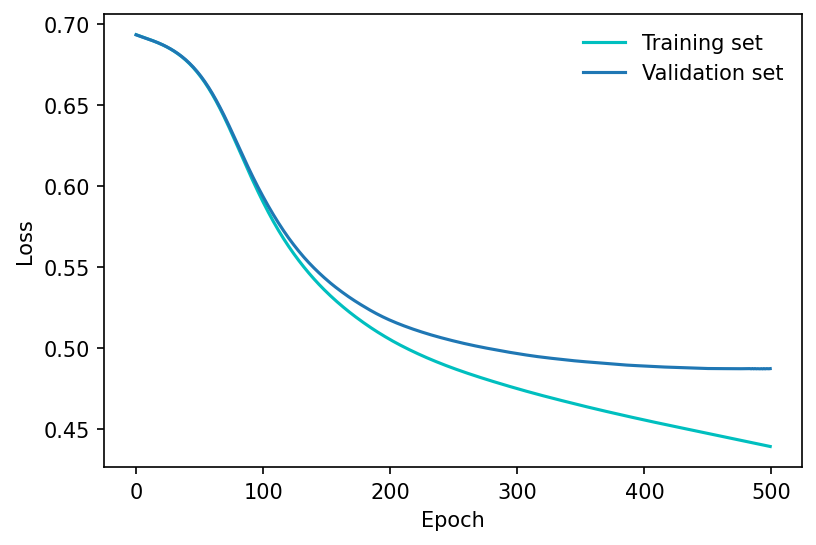

In [8]:
acc = dnn.fit (X.astype(np.float32), Y.astype(np.float32), X_val.astype(np.float32), Y_val.astype(np.float32))

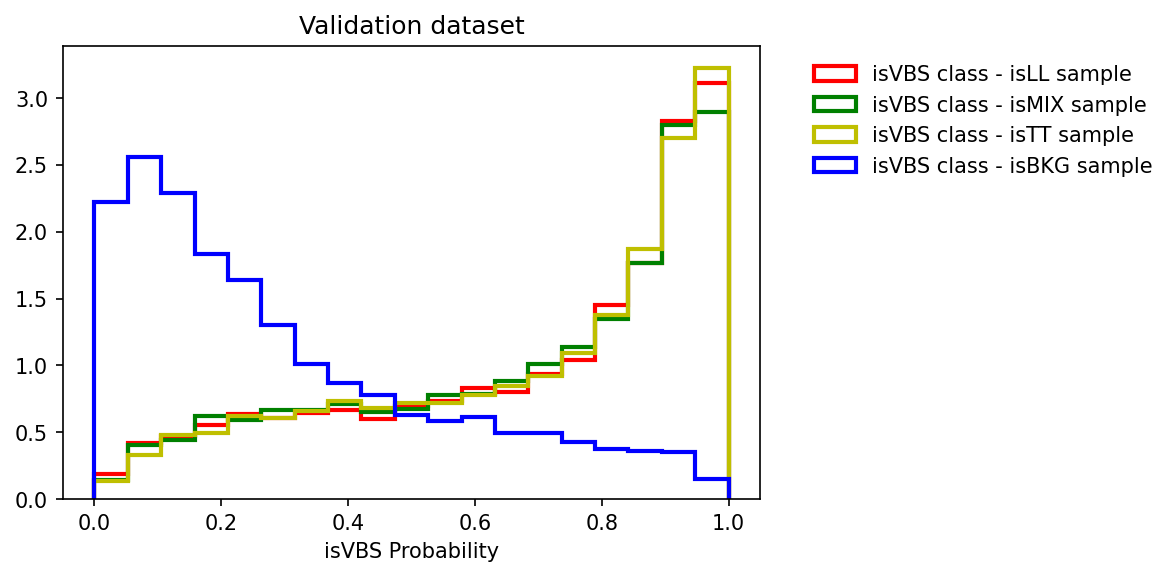

In [9]:
Y_predict_train = dnn.predict_proba(X)
Y_predict_val = dnn.predict_proba(X_val)

axis = np.linspace(0,1,20)

targets = ['isLL', 'isMIX', 'isTT', 'isBKG']
predictions = ['isVBS']
colors = ['r', 'g', 'y', 'b']
 
Y_targets = {}
Y_predictions = {}

for target in targets:
    #Y_targets[target] = dnn.predict_proba( df_val[ df_val[target]==1 ].values[:,0:NDIM] )
    if target != 'isBKG':
        Y_targets[target] = dnn.predict_proba( df[ df[target]==1 ].values[:,0:NDIM] )
    else:
        Y_targets[target] = dnn.predict_proba( df_val[ df_val[target]==1 ].values[:,0:NDIM] )
    Y_predictions[target] = {}
    for iprediction, prediction in enumerate(predictions):
        Y_predictions[target][prediction] = Y_targets[target][:,iprediction]

for prediction in predictions:
    for target, mycolor in zip(targets, colors):
        plt.hist(Y_predictions[target][prediction].numpy(), bins = axis, label = prediction + ' class - ' + target + ' sample', histtype='step', color=mycolor,  density=True, linewidth=2 )
    plt.title('Validation dataset')
    plt.xlabel(prediction + ' Probability')
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
    #plt.yscale('log')
    plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#from matplotlib.backends.backend_pdf import PdfPages

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 16)
    plt.yticks(tick_marks, classes, fontsize = 16)

    thresh = cm.max() / 1.2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=10)

    plt.xlabel("Predicted label", fontsize=16)
    plt.ylabel("True label", fontsize=16)

    
    plt.tight_layout()

In [11]:
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp, anderson_ksamp

X = df_val.values[:,0:NDIM]
Y_true = df_val[['isVBS', 'isBKG']].values
Y_pred = dnn.predict_proba(X)

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max = np.argmax(Y_true, axis=1)
Y_pred_max = np.argmax(Y_pred, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max, Y_pred_max))

Classifier categorical accuracy =  0.7669616519174042


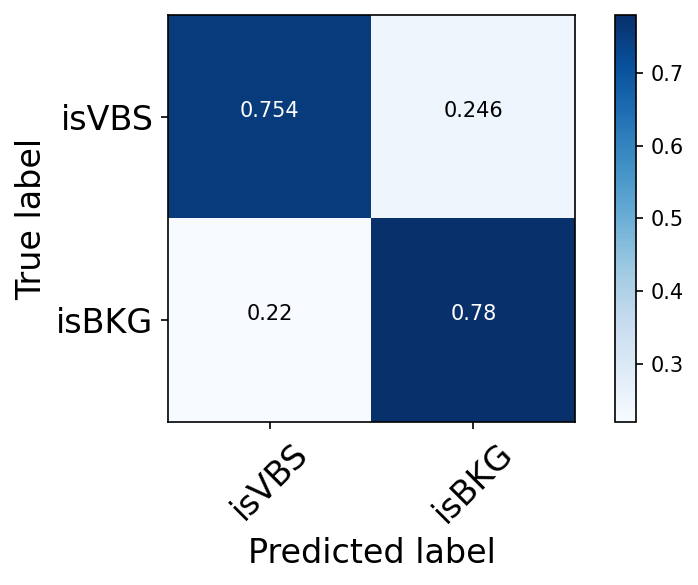

In [12]:
C = confusion_matrix(Y_true_max, Y_pred_max, normalize="true")
C = np.around(C, decimals=3)

plt.figure()
plot_confusion_matrix(C, classes=['isVBS', 'isBKG'], title='')
plt.show(1) 

In [13]:
X    = df.values[:,0:NDIM]
print(len(dnn.predict_proba(X)[...,0]))
df['DNN_SigVsBkg'] = dnn.predict_proba(X)[...,0].numpy().tolist()

83466


In [14]:
print(len(df))
print(len(df[(df['DNN_SigVsBkg'] > 0.5) & (df['isBKG'] == 1)]))
print(len(df[(df['DNN_SigVsBkg'] > 0.5) & (df['isLL'] == 1)]))
print(len(df[(df['DNN_SigVsBkg'] > 0.5) & (df['isMIX'] == 1)]))
print(len(df[(df['DNN_SigVsBkg'] > 0.5) & (df['isTT'] == 1)]))

df_other = df[((df['isTT'] + df['isMIX'] + df['isLL']) == 1) & (df['DNN_SigVsBkg'] > 0.5)]

df_notLL = df_other[df_other['notLL'] == 1].sample(n=int(len(df_other[df_other['notLL'] == 1])/2))
df_notTT= df_other[df_other['notTT'] == 1].sample(n=int(len(df_other[df_other['notTT'] == 1])/2))

df_LL = pd.concat([df_notLL, df_other[df_other['isLL'] == 1]])
df_TT = pd.concat([df_notTT, df_other[df_other['isTT'] == 1]])

83466
5264
6753
6716
6794


In [15]:
df_LL

,CleanJet_eta_1,CleanJet_eta_2,CleanJet_phi_1,CleanJet_phi_2,CleanJet_pt_1,CleanJet_pt_2,Lepton_eta_1,Lepton_eta_2,Lepton_phi_1,Lepton_phi_2,Lepton_pt_1,Lepton_pt_2,Rpt,Zepp_l1,Zepp_l2,Zepp_ll,detajj,detall,dphijj,dphilep1jet1,dphilep1jet2,dphilep1jj,dphilep2jet1,dphilep2jet2,dphilep2jj,dphill,dphilljet,dphilljetjet,dphillmet,dphilmet1,dphilmet2,dr_l1j1,dr_l1j2,dr_l2j1,dr_l2j2,drll,ht,m2ljj30,mT2,mTi,m_l1j1,m_l1j2,m_l2j1,m_l2j2,mcoll,mcollWW,mjj,mll,mtw1,mtw2,phi_miss,proxyW_l1,proxyW_l2,pt_miss,ptll,recoil,yll,isLL,isMIX,isTT,isBKG,isVBS,notLL,notTT,DNN_SigVsBkg
70917,-3.092285,1.499023,2.187500,1.440918,157.166031,52.063175,-1.562988,-0.656494,-0.072418,-2.857422,96.386803,57.625023,0.678796,-0.766357,0.140137,0.313110,4.591309,0.906494,0.746582,2.259918,1.513336,2.080887,1.238263,1.984846,1.417295,2.785004,2.703020,2.523989,0.939242,1.382344,1.402660,2.728732,3.415568,5.602170,4.808532,2.928818,530.825073,1072.307251,19.612677,348.181213,304.772980,327.348541,314.234222,169.695938,228.121277,291.495880,892.626770,162.492233,162.029800,126.814606,-1.454762,272.820129,142.813248,167.584045,46.917835,198.921967,-1.217005,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.808055
59459,0.581299,-3.280762,1.704102,-1.308350,225.053024,135.194000,0.511841,-1.573486,0.362244,-0.467712,36.858833,18.419266,0.022314,1.861572,-0.223755,0.818909,3.862061,2.085327,3.012451,1.341858,1.670593,1.152786,2.171814,0.840637,1.982742,0.829956,1.610918,1.421846,1.930716,2.199776,1.369820,1.343654,4.144239,3.059391,1.903013,2.244419,526.447998,1343.913086,70.342552,135.631653,117.120461,471.837585,204.428085,106.199913,16.623631,176.293900,1230.585449,68.053810,87.136017,43.726074,-1.837532,90.733963,74.377235,64.846382,51.129742,66.961327,-0.264890,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.903923
65929,2.535156,-1.600830,-1.598877,1.245605,133.824417,53.164108,1.101562,0.198730,-0.389038,-2.561523,63.651546,31.910093,0.285485,0.634399,-0.268433,0.182983,4.135986,0.902832,2.844482,1.209839,1.634644,1.024448,0.962646,2.476056,1.148037,2.172485,0.686486,0.501095,2.824813,2.301459,1.809241,1.875873,3.158320,2.526969,4.211015,2.352615,399.748535,776.867737,76.063339,228.930252,179.216339,226.318878,200.145462,115.193047,15.702890,162.733032,677.865295,90.181892,157.723129,96.157379,1.912421,186.766861,96.924858,117.198364,52.634521,69.154572,0.791606,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.783956
72296,1.422607,-2.786621,-0.685425,2.348145,404.592499,114.317879,0.659424,0.015083,2.346680,-1.586426,445.382507,78.496254,0.755875,1.341431,0.697090,1.019260,4.209229,0.644341,3.033569,3.032104,0.001465,2.989767,0.901001,2.348615,0.943338,2.350080,3.108937,3.131911,2.828755,2.970899,0.620819,3.126677,3.446045,1.671205,4.830154,2.436811,1173.684937,2435.389160,324.226959,578.783264,912.235962,1223.763062,316.836487,401.437958,461.371277,494.615082,1791.726929,366.175690,421.634705,54.264511,-0.965607,444.925842,54.281044,100.518684,394.193298,300.151855,0.558945,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.908375
70920,-1.737305,3.809082,0.166656,1.801758,324.955566,38.819939,0.965088,0.387634,-2.032715,1.817383,114.886208,58.149158,0.529581,-0.070801,-0.648254,0.359528,5.546387,0.577454,1.635101,2.199371,2.448713,2.318936,1.650726,0.015625,1.531162,2.433088,2.690584,2.810149,0.468256,0.959469,1.473619,3.484273,4.774043,2.690774,3.421484,2.500674,778.057373,2043.885498,143.352966,323.671753,777.200684,289.505768,405.216370,254.384308,282.466492,344.249573,1798.984741,160.613968,153.676437,159.167786,-2.992184,226.931168,165.737137,241.246521,80.216133,314.915924,0.768749,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.945333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55638,-1.153320,1.540771,-2.131836,-2.070312,235.171143,114.415413,-0.848755,1.215820,1.506836,0.788208,334.497192,33.498402,0.416436,-1.042480,1.02209

In [16]:
for col in df.columns:
    df_LL[col] = np.hstack(df_LL[col])
    df_TT[col] = np.hstack(df_TT[col])
'''
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df = shuffle(df)
'''
# Perform the splitting and define training and validation datasets
msk_LL = np.random.rand(len(df_LL)) < 0.8
msk_TT = np.random.rand(len(df_TT)) < 0.8

df_train_LL = df_LL[msk_LL]
df_train_TT = df_TT[msk_TT]
df_val_LL   = df_LL[~msk_LL]
df_val_TT   = df_TT[~msk_TT]

X_LL = df_train_LL.values[:,0:NDIM]
Y_LL = df_train_LL[['isLL', 'notLL']].values
#Y_LL = df_train_LL[['isLL']].values
X_val_LL = df_val_LL.values[:,0:NDIM]
Y_val_LL = df_val_LL[['isLL', 'notLL']].values
#Y_val_LL = df_val_LL[['isLL']].values

X_TT = df_train_TT.values[:,0:NDIM]
Y_TT = df_train_TT[['isTT', 'notTT']].values
#Y_TT = df_train_TT[['isTT']].values
X_val_TT = df_val_TT.values[:,0:NDIM]
Y_val_TT = df_val_TT[['isTT', 'notTT']].values
#Y_val_TT = df_val_TT[['isTT']].values

#X_val = df_val.values[:,0:NDIM+1]
#Y_val = df_val.values[:,NDIM+1:NDIM+1+nclasses] # isLL, isMIX, isTT, isBKG
print(X_LL,Y_LL)

[[-3.09228516e+00  1.49902344e+00  2.18750000e+00 ...  4.69178352e+01
   1.98921967e+02 -1.21700537e+00]
 [ 5.81298828e-01 -3.28076172e+00  1.70410156e+00 ...  5.11297417e+01
   6.69613266e+01 -2.64889568e-01]
 [ 1.42260742e+00 -2.78662109e+00 -6.85424805e-01 ...  3.94193298e+02
   3.00151855e+02  5.58944702e-01]
 ...
 [-3.79199219e+00  4.08593750e+00 -1.27197266e+00 ...  3.86144379e+02
   1.02425438e+02  5.98931074e-01]
 [-1.73803711e+00  3.50634766e+00 -1.67895508e+00 ...  7.54058151e+01
   4.03486404e+01  8.97303402e-01]
 [-2.63818359e+00  1.10015869e-01  7.11425781e-01 ...  6.00744820e+01
   1.00857300e+02 -6.70705855e-01]] [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [20]:
dnnLL = SimpleNeuralNetwork(200, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=X_LL.shape[1], n_outputsC=2)
dnnLL.save_weights("LLvsOther_emu_RDF")

In [21]:
print(X_LL.shape, Y_LL.shape)

(10827, 57) (10827, 2)


100%|██████████| 200/200 [00:05<00:00, 38.60it/s]


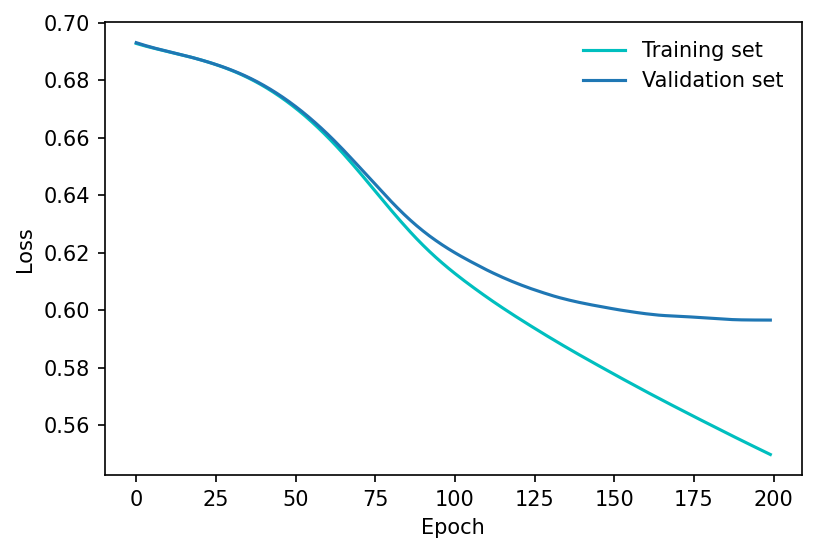

In [22]:
acc = dnnLL.fit (X_LL.astype(np.float32), Y_LL.astype(np.float32), X_val_LL.astype(np.float32), Y_val_LL.astype(np.float32))

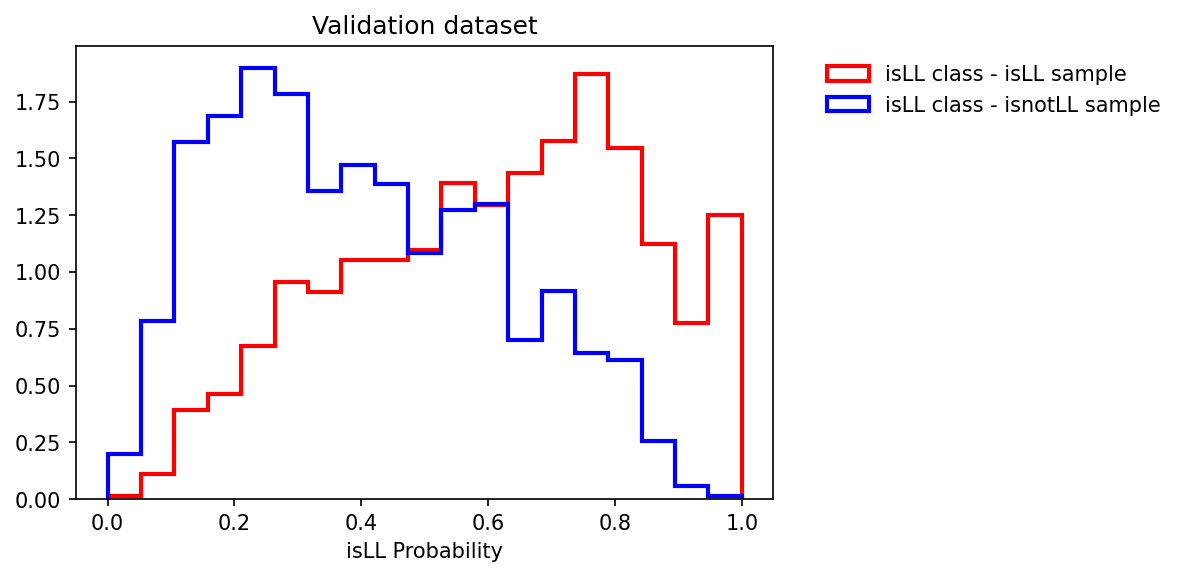

In [23]:
Y_predict_train_LL = dnnLL.predict_proba(X_LL)
Y_predict_val_LL = dnnLL.predict_proba(X_val_LL)

axis = np.linspace(0,1,20)

plt.hist(dnnLL.predict_proba( df_val_LL[ df_val_LL['isLL']==1 ].values[:,0:NDIM] ).numpy()[...,0], bins = axis, label = 'isLL class - isLL sample', histtype='step', color='r',  density=True, linewidth=2 )
plt.hist(dnnLL.predict_proba( df_val_LL[ df_val_LL['isLL']==0 ].values[:,0:NDIM] ).numpy()[...,0], bins = axis, label = 'isLL class - isnotLL sample', histtype='step', color='b',  density=True, linewidth=2 )
plt.title('Validation dataset')
plt.xlabel('isLL Probability')
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
#plt.yscale('log')
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp, anderson_ksamp

X_LL = df_val_LL.values[:,0:NDIM]
Y_true_LL = df_val_LL[['isLL', 'notLL']].values
Y_pred_LL = dnnLL.predict_proba(X_LL)

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max_LL = np.argmax(Y_true_LL, axis=1)
Y_pred_max_LL = np.argmax(Y_pred_LL, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max_LL, Y_pred_max_LL))

Classifier categorical accuracy =  0.669899291309213


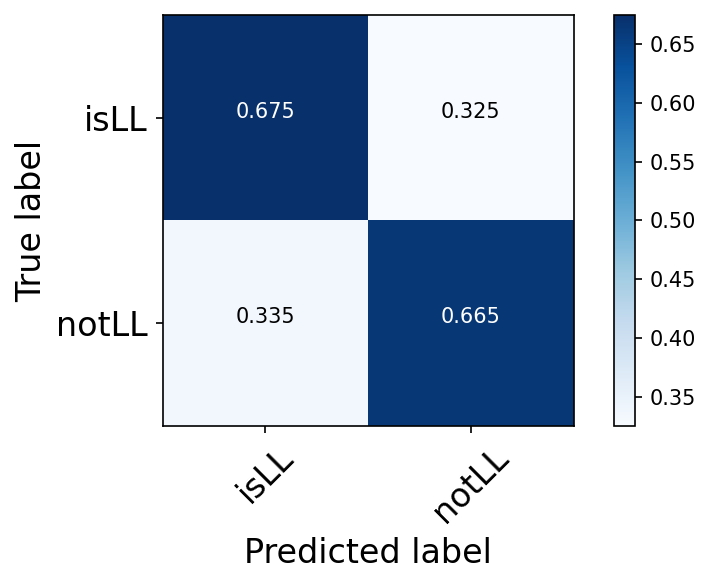

In [25]:
C = confusion_matrix(Y_true_max_LL, Y_pred_max_LL, normalize="true")
C = np.around(C, decimals=3)

plt.figure()
plot_confusion_matrix(C, classes=['isLL', 'notLL'], title='')
plt.show(1) 

In [26]:
dnnTT = SimpleNeuralNetwork(210, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=X_TT.shape[1], n_outputsC=2)
dnnTT.save_weights("TTvsOther_emu_RDF")

100%|██████████| 210/210 [00:05<00:00, 38.81it/s]


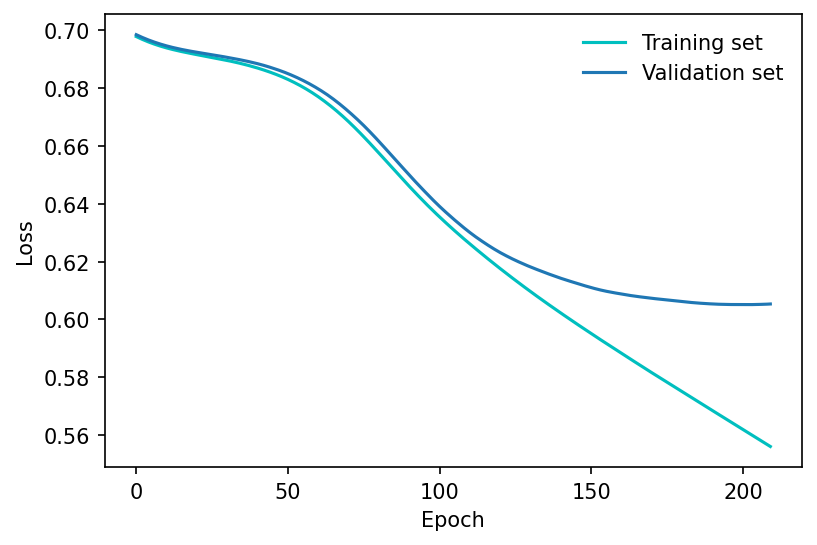

In [27]:
acc = dnnTT.fit (X_TT.astype(np.float32), Y_TT.astype(np.float32), X_val_TT.astype(np.float32), Y_val_TT.astype(np.float32))

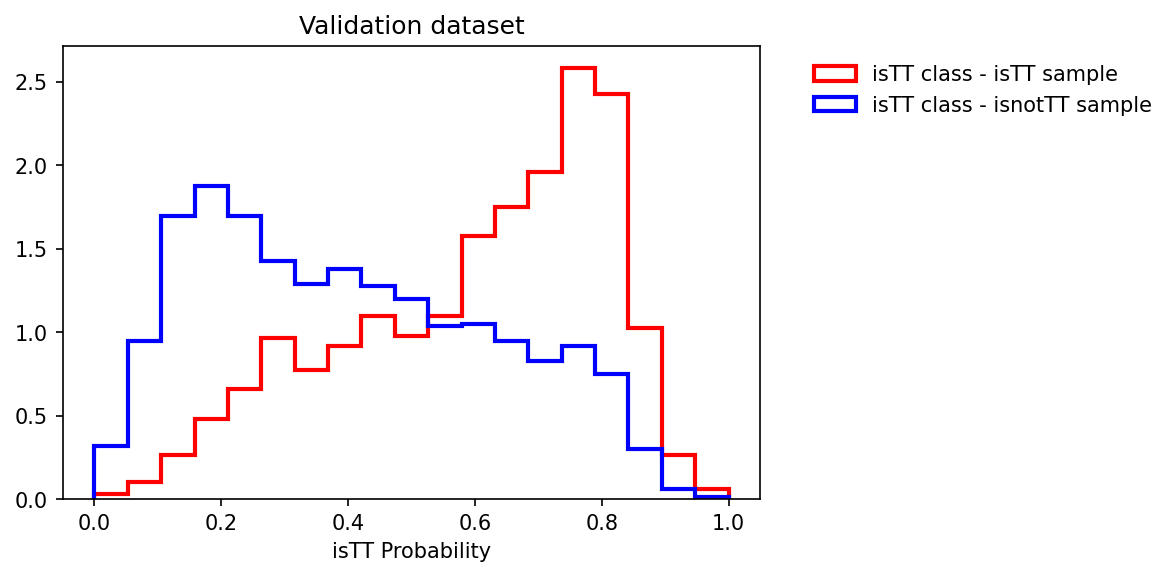

In [28]:
Y_predict_train_TT = dnnTT.predict_proba(X_TT)
Y_predict_val_TT = dnnTT.predict_proba(X_val_TT)

axis = np.linspace(0,1,20)

plt.hist(dnnTT.predict_proba( df_val_TT[ df_val_TT['isTT']==1 ].values[:,0:NDIM] ).numpy()[...,0], bins = axis, label = 'isTT class - isTT sample', histtype='step', color='r',  density=True, linewidth=2 )
plt.hist(dnnTT.predict_proba( df_val_TT[ df_val_TT['isTT']==0 ].values[:,0:NDIM] ).numpy()[...,0], bins = axis, label = 'isTT class - isnotTT sample', histtype='step', color='b',  density=True, linewidth=2 )
plt.title('Validation dataset')
plt.xlabel('isTT Probability')
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
#plt.yscale('log')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp, anderson_ksamp

X_TT = df_val_TT.values[:,0:NDIM]
Y_true_TT = df_val_TT[['isTT', 'notTT']].values
Y_pred_TT = dnnTT.predict_proba(X_TT)

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max_TT = np.argmax(Y_true_TT, axis=1)
Y_pred_max_TT = np.argmax(Y_pred_TT, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max_TT, Y_pred_max_TT))

Classifier categorical accuracy =  0.679002726918582


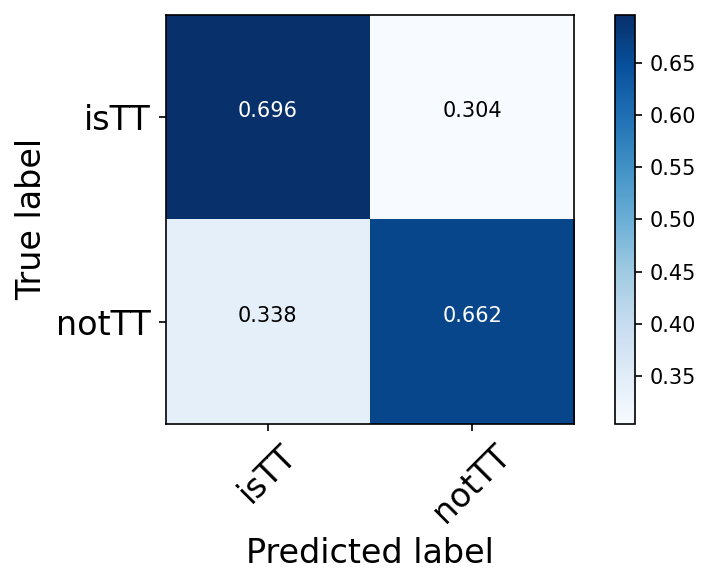

In [30]:
C = confusion_matrix(Y_true_max_TT, Y_pred_max_TT, normalize="true")
C = np.around(C, decimals=3)

plt.figure()
plot_confusion_matrix(C, classes=['isTT', 'notTT'], title='')
plt.show(1) 

In [31]:
print(len(dnnLL.predict_proba(X_val_LL)[...,0]))
print(len(dnnTT.predict_proba(X_val_LL)[...,0]))
df_val_LL['DNN_LL'] = dnnLL.predict_proba(X_val_LL)[...,0].numpy().tolist()
df_val_LL['DNN_TT'] = dnnTT.predict_proba(X_val_LL)[...,0].numpy().tolist()
df_val_bkg = df[(df['DNN_SigVsBkg'] > 0.5) & (df['isBKG'] == 1)]
X_val_bkg = df_val_bkg.values[:,0:NDIM]
df_val_bkg['DNN_LL'] = dnnLL.predict_proba(X_val_bkg)[...,0].numpy().tolist()
df_val_bkg['DNN_TT'] = dnnTT.predict_proba(X_val_bkg)[...,0].numpy().tolist()
print(df_val_LL)
print(df_val_bkg)

2681
2681
       CleanJet_eta_1  CleanJet_eta_2  CleanJet_phi_1  CleanJet_phi_2  \
65929        2.535156       -1.600830       -1.598877        1.245605   
56774       -3.569336        3.067383       -1.486084        0.841431   
73752        2.403320       -1.788086       -3.137695       -0.072617   
65413        1.079346       -1.475342       -2.329590       -1.080811   
64848        2.161133       -2.320312       -2.862305        1.224854   
...               ...             ...             ...             ...   
55607       -1.851562        3.745605       -1.714355        0.733032   
55608       -2.174805        1.967773        2.919922       -0.133667   
55632        3.305664       -0.553223       -1.116455        2.641113   
55637       -3.242188        4.319336       -1.834473       -0.822876   
55638       -1.153320        1.540771       -2.131836       -2.070312   

       CleanJet_pt_1  CleanJet_pt_2  Lepton_eta_1  Lepton_eta_2  Lepton_phi_1  \
65929     133.824417      53.164

/tmp/ipykernel_176/3038950175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_LL['DNN_LL'] = dnnLL.predict_proba(X_val_LL)[...,0].numpy().tolist()
/tmp/ipykernel_176/3038950175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_LL['DNN_TT'] = dnnTT.predict_proba(X_val_LL)[...,0].numpy().tolist()
/tmp/ipykernel_176/3038950175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

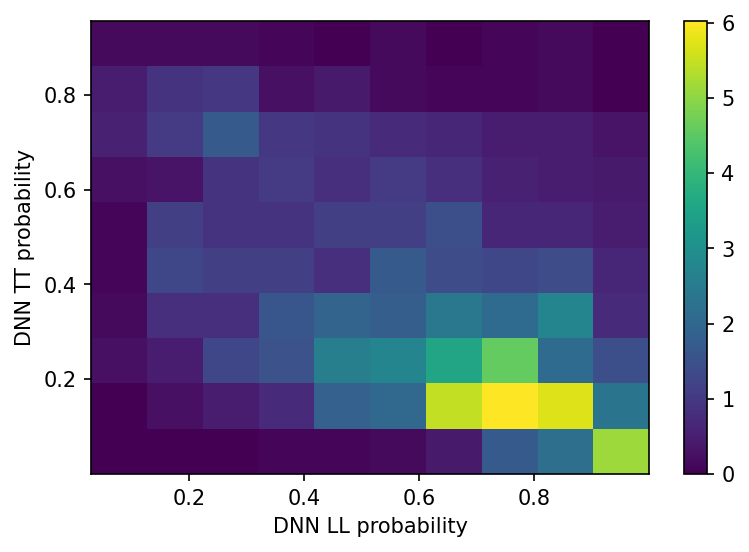

In [29]:
LL = df_val_LL[df_val_LL['isLL'] == 1]
mix = df_val_LL[df_val_LL['isMIX'] == 1]
TT = df_val_LL[df_val_LL['isTT'] == 1]

fig, ax = plt.subplots()
h_isLL = ax.hist2d(LL['DNN_LL'].values, LL['DNN_TT'].values, density=True)
fig.colorbar(h_isLL[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

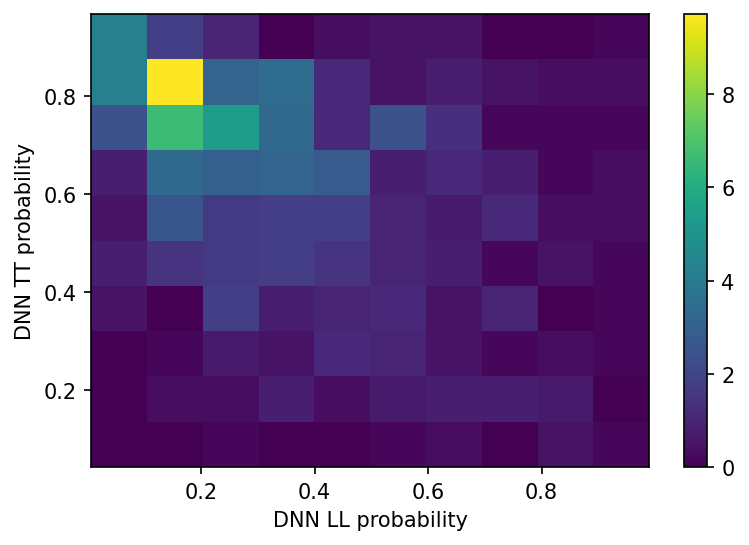

In [30]:
fig, ax = plt.subplots()
h_isTT = ax.hist2d(TT['DNN_LL'].values, TT['DNN_TT'].values, density=True)
fig.colorbar(h_isTT[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

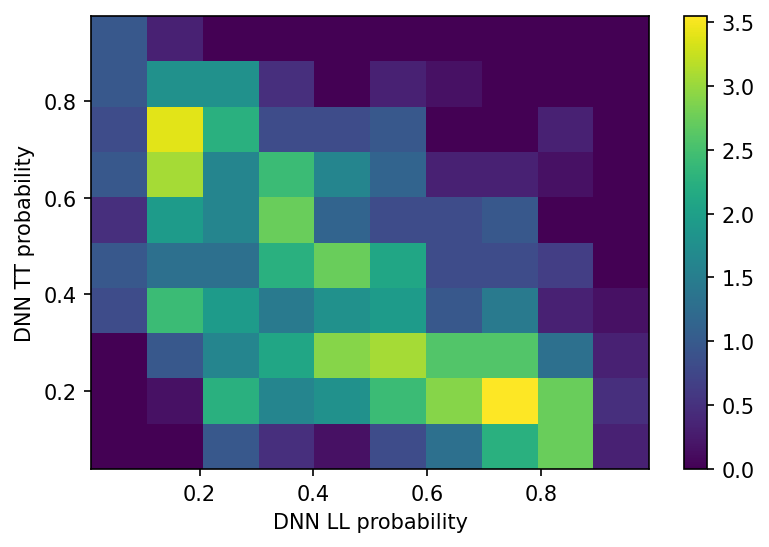

In [31]:
fig, ax = plt.subplots()
h_isMIX = ax.hist2d(mix['DNN_LL'].values, mix['DNN_TT'].values, density=True)
fig.colorbar(h_isMIX[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

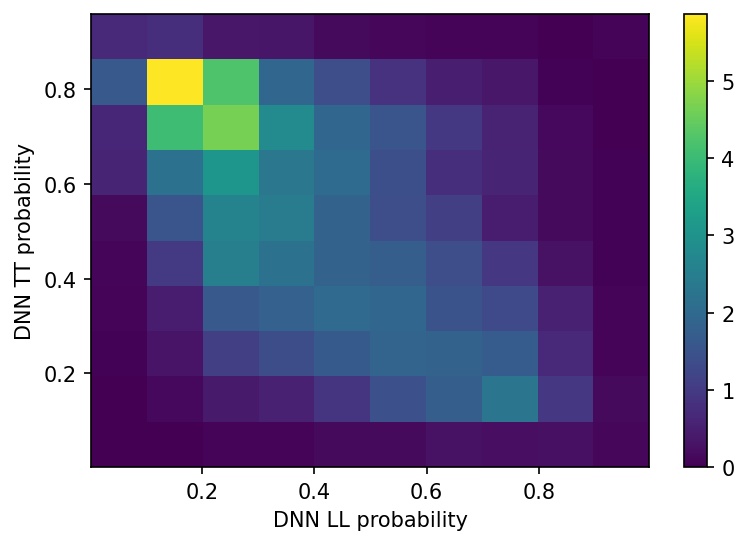

In [32]:
fig, ax = plt.subplots()
h_isBKG = ax.hist2d(df_val_bkg['DNN_LL'].values, df_val_bkg['DNN_TT'].values, density=True)
fig.colorbar(h_isBKG[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

/tmp/ipykernel_176/3595125263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_TT['DNN_LL'] = dnnLL.predict_proba(X_val_TT)[...,0].numpy().tolist()
/tmp/ipykernel_176/3595125263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_TT['DNN_TT'] = dnnTT.predict_proba(X_val_TT)[...,0].numpy().tolist()


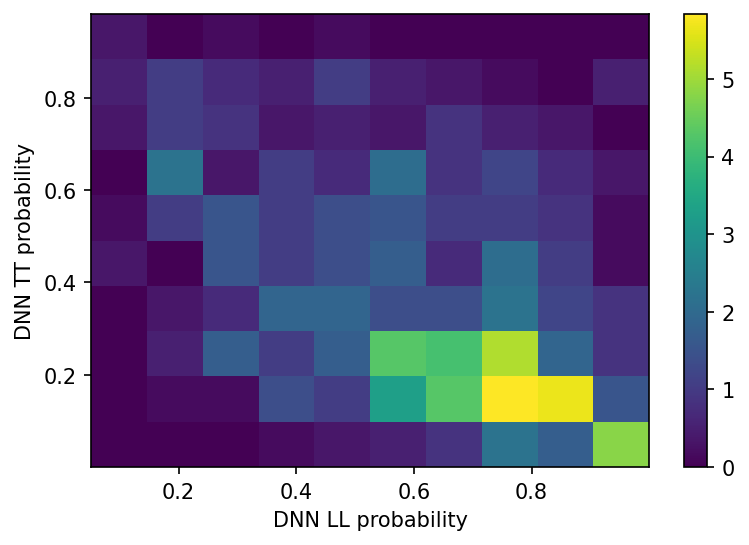

In [33]:
df_val_TT['DNN_LL'] = dnnLL.predict_proba(X_val_TT)[...,0].numpy().tolist()
df_val_TT['DNN_TT'] = dnnTT.predict_proba(X_val_TT)[...,0].numpy().tolist()

LL = df_val_TT[df_val_TT['isLL'] == 1]
mix = df_val_TT[df_val_TT['isMIX'] == 1]
TT = df_val_TT[df_val_TT['isTT'] == 1]

fig, ax = plt.subplots()
h_isLL = ax.hist2d(LL['DNN_LL'].values, LL['DNN_TT'].values, density=True)
fig.colorbar(h_isLL[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

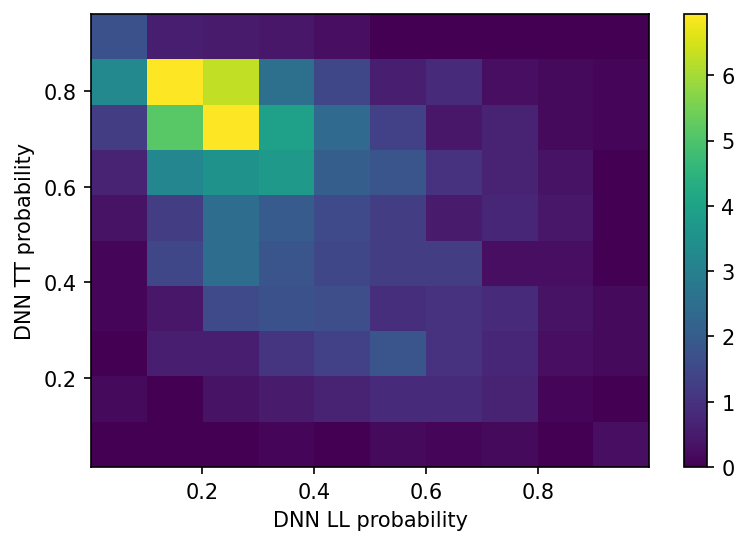

In [34]:
fig, ax = plt.subplots()
h_isTT = ax.hist2d(TT['DNN_LL'].values, TT['DNN_TT'].values, density=True)
fig.colorbar(h_isTT[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

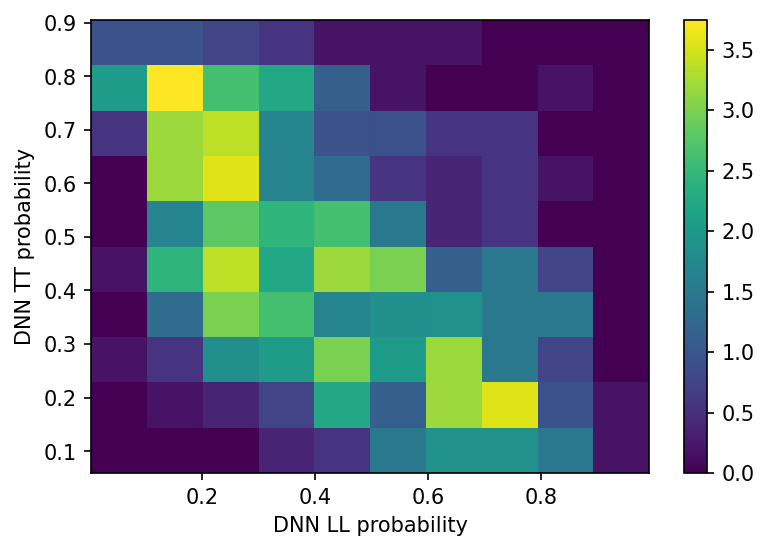

In [35]:
fig, ax = plt.subplots()
h_isMIX = ax.hist2d(mix['DNN_LL'].values, mix['DNN_TT'].values, density=True)
fig.colorbar(h_isMIX[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

In [36]:
with open('generated_code_dnn_SigVsBkg_emu.h', 'w') as f:


    print ("""
    // Select all (Ctrl+A), Copy (Ctrl+C), paste to an empty text file (Ctrl+V) and save that file as 'generated_code.h'
    // 
    // Auto-generated header file. Assumes img to be a floating point array
    // of 64 elements (corresponding to an 8x8 b&w image)

    #include <math.h>

    float norma_VBS;
    """, file=f)
    
    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnn.model1.layers):
      print(type(layer))
#       if type(layer) is not Dropout and type(layer) is not Input :
      if type(layer) is Dense:
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1
        print ("inline float activation_VBS_%d (float x, float n) " % iLayer_tmp, file=f);
        activation =  layer.get_config()['activation'] 
        if activation == 'sigmoid':
          print ("{ return 1./(1 + exp(-x)); }", file=f)
        elif activation == 'tanh':
          print ("{ return tanh(x);}")
        elif activation == 'relu':
          print ("{ return x > 0 ? x : 0;}", file=f)
        elif activation == 'linear':
          print ("{ return x;}")
        elif activation == 'softmax':
          print ("{ return exp(x)/n;  }", file=f)
        else:
          raise KeyError ("Unexpected activation %s"%activation)
      
    iLayer_tmp=-1

    
    print ("""
    float guess_VBS (const float *img, int flag)
    {
    """, file=f)

    max_out = 100
    for iLayer, layer in enumerate(dnn.model1.layers):
      if type(layer) is Dense:
        iLayer_tmp+=1
        print ("  // Declare the arrays in the stack", file=f)
        kernel, bias = layer.get_weights()
        
        print (type (dnn.means))
        print (type(bias))
        
         
        max_out = max(kernel.shape[1], max_out)
        #print ("  //",bias.shape)
        kernel_values = "{%s}"%(',\n   '.join(["{%s}"%(','.join(["%18.13f"%x for x in row])) for row in kernel]))
        bias_values   = "{%s}"% ( ",".join(["%18.13f"%x for x in bias]))
        print ("  const float kernel_%d[%d][%d] = \n  %s;" % (iLayer_tmp, kernel.shape[0], kernel.shape[1],kernel_values), file=f)
        print ("  const float bias_%d[%d] = %s;" % (iLayer_tmp, bias.shape[0], bias_values), file=f)
      
    print ("  float buffer_in[%d];" % max_out, file=f)
    print ("  float buffer_out[%d];" % max_out, file=f)

    print ("  unsigned int i,j,c; ", file=f)
    

    mean_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnn.means]))
    sigma_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnn.sigmas]))
    

    print (" float mean[%d] = %s;" % (max_out, mean_values), file=f)
    print (" float sigma[%d] = %s;" % (max_out, sigma_values), file=f)

    print ("\n\n\n", file=f)
    print ("  // Load the input in the buffer", file=f)
    print ("  for (c = 0; c < 64; ++c) \n  buffer_in[c] = (img[c]-mean[c])/sigma[c];", file=f)



    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnn.model1.layers):
      if type(layer) is Dense: 
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1

        if iLayer != len(dnn.model1.layers)-1:
            
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_VBS = 0;

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_VBS_{iLayer_tmp}(buffer_out[c], norma_VBS);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
            
        else:
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_VBS = 0;

            for(c=0;c<{n_out};++c)
              norma_VBS+=exp(buffer_out[c]);

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_VBS_{iLayer_tmp}(buffer_out[c], norma_VBS);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
      
    last_kernel, last_bias = dnn.model1.layers[-1].get_weights()
    print ("""
      //i = 0;
      //for (c = 0; c < {n_out}; ++c)
      //  if (buffer_in[c] > buffer_in[i])
      //    i = c;
      
      if (flag==0) //vbf
        return buffer_in[0];
      else if (flag==1) //bkg
        return buffer_in[1];
         
      
      //return i;
    """.format(n_out = last_kernel.shape[1]), file=f)

    print ("}", file=f)

<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [37]:
with open('generated_code_dnn_emu_LLVsOther.h', 'w') as f:


    print ("""
    // Select all (Ctrl+A), Copy (Ctrl+C), paste to an empty text file (Ctrl+V) and save that file as 'generated_code.h'
    // 
    // Auto-generated header file. Assumes img to be a floating point array
    // of 64 elements (corresponding to an 8x8 b&w image)

    #include <math.h>

    float norma_LL;
    """, file=f)
    
    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnnLL.model1.layers):
      print(type(layer))
#       if type(layer) is not Dropout and type(layer) is not Input :
      if type(layer) is Dense:
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1
        print ("inline float activation_LL_%d (float x, float n) " % iLayer_tmp, file=f);
        activation =  layer.get_config()['activation'] 
        if activation == 'sigmoid':
          print ("{ return 1./(1 + exp(-x)); }", file=f)
        elif activation == 'tanh':
          print ("{ return tanh(x);}")
        elif activation == 'relu':
          print ("{ return x > 0 ? x : 0;}", file=f)
        elif activation == 'linear':
          print ("{ return x;}")
        elif activation == 'softmax':
          print ("{ return exp(x)/n;  }", file=f)
        else:
          raise KeyError ("Unexpected activation %s"%activation)
      
    iLayer_tmp=-1

    
    print ("""
    float guess_LL (const float *img, int flag)
    {
    """, file=f)

    max_out = 100
    for iLayer, layer in enumerate(dnnLL.model1.layers):
      if type(layer) is Dense:
        iLayer_tmp+=1
        print ("  // Declare the arrays in the stack", file=f)
        kernel, bias = layer.get_weights()
        
        print (type (dnnLL.means))
        print (type(bias))
        
         
        max_out = max(kernel.shape[1], max_out)
        #print ("  //",bias.shape)
        kernel_values = "{%s}"%(',\n   '.join(["{%s}"%(','.join(["%18.13f"%x for x in row])) for row in kernel]))
        bias_values   = "{%s}"% ( ",".join(["%18.13f"%x for x in bias]))
        print ("  const float kernel_%d[%d][%d] = \n  %s;" % (iLayer_tmp, kernel.shape[0], kernel.shape[1],kernel_values), file=f)
        print ("  const float bias_%d[%d] = %s;" % (iLayer_tmp, bias.shape[0], bias_values), file=f)
      
    print ("  float buffer_in[%d];" % max_out, file=f)
    print ("  float buffer_out[%d];" % max_out, file=f)

    print ("  unsigned int i,j,c; ", file=f)
    

    mean_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnnLL.means]))
    sigma_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnnLL.sigmas]))
    

    print (" float mean[%d] = %s;" % (max_out, mean_values), file=f)
    print (" float sigma[%d] = %s;" % (max_out, sigma_values), file=f)

    print ("\n\n\n", file=f)
    print ("  // Load the input in the buffer", file=f)
    print ("  for (c = 0; c < 64; ++c) \n  buffer_in[c] = (img[c]-mean[c])/sigma[c];", file=f)



    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnnLL.model1.layers):
      if type(layer) is Dense: 
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1

        if iLayer != len(dnnLL.model1.layers)-1:
            
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_LL = 0;

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_LL_{iLayer_tmp}(buffer_out[c], norma_LL);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
            
        else:
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_LL = 0;

            for(c=0;c<{n_out};++c)
              norma_LL+=exp(buffer_out[c]);

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_LL{iLayer_tmp}(buffer_out[c], norma_LL);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
      
    last_kernel, last_bias = dnnLL.model1.layers[-1].get_weights()
    print ("""
      //i = 0;
      //for (c = 0; c < {n_out}; ++c)
      //  if (buffer_in[c] > buffer_in[i])
      //    i = c;
      
      if (flag==0) //vbf
        return buffer_in[0];
      else if (flag==1) //bkg
        return buffer_in[1];
         
      
      //return i;
    """.format(n_out = last_kernel.shape[1]), file=f)

    print ("}", file=f)

<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
with open('generated_code_dnn_TTVsOther.h', 'w') as f:


    print ("""
    // Select all (Ctrl+A), Copy (Ctrl+C), paste to an empty text file (Ctrl+V) and save that file as 'generated_code.h'
    // 
    // Auto-generated header file. Assumes img to be a floating point array
    // of 64 elements (corresponding to an 8x8 b&w image)

    #include <math.h>

    float norma_TT;
    """, file=f)
    
    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnnTT.model1.layers):
      print(type(layer))
#       if type(layer) is not Dropout and type(layer) is not Input :
      if type(layer) is Dense:
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1
        print ("inline float activation_TT_%d (float x, float n) " % iLayer_tmp, file=f);
        activation =  layer.get_config()['activation'] 
        if activation == 'sigmoid':
          print ("{ return 1./(1 + exp(-x)); }", file=f)
        elif activation == 'tanh':
          print ("{ return tanh(x);}")
        elif activation == 'relu':
          print ("{ return x > 0 ? x : 0;}", file=f)
        elif activation == 'linear':
          print ("{ return x;}")
        elif activation == 'softmax':
          print ("{ return exp(x)/n;  }", file=f)
        else:
          raise KeyError ("Unexpected activation %s"%activation)
      
    iLayer_tmp=-1

    
    print ("""
    float guess_TT (const float *img, int flag)
    {
    """, file=f)

    max_out = 100
    for iLayer, layer in enumerate(dnnTT.model1.layers):
      if type(layer) is Dense:
        iLayer_tmp+=1
        print ("  // Declare the arrays in the stack", file=f)
        kernel, bias = layer.get_weights()
        
        print (type (dnnTT.means))
        print (type(bias))
        
         
        max_out = max(kernel.shape[1], max_out)
        #print ("  //",bias.shape)
        kernel_values = "{%s}"%(',\n   '.join(["{%s}"%(','.join(["%18.13f"%x for x in row])) for row in kernel]))
        bias_values   = "{%s}"% ( ",".join(["%18.13f"%x for x in bias]))
        print ("  const float kernel_%d[%d][%d] = \n  %s;" % (iLayer_tmp, kernel.shape[0], kernel.shape[1],kernel_values), file=f)
        print ("  const float bias_%d[%d] = %s;" % (iLayer_tmp, bias.shape[0], bias_values), file=f)
      
    print ("  float buffer_in[%d];" % max_out, file=f)
    print ("  float buffer_out[%d];" % max_out, file=f)

    print ("  unsigned int i,j,c; ", file=f)
    

    mean_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnnTT.means]))
    sigma_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnnTT.sigmas]))
    

    print (" float mean[%d] = %s;" % (max_out, mean_values), file=f)
    print (" float sigma[%d] = %s;" % (max_out, sigma_values), file=f)

    print ("\n\n\n", file=f)
    print ("  // Load the input in the buffer", file=f)
    print ("  for (c = 0; c < 64; ++c) \n  buffer_in[c] = (img[c]-mean[c])/sigma[c];", file=f)



    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnnTT.model1.layers):
      if type(layer) is Dense: 
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1

        if iLayer != len(dnnTT.model1.layers)-1:
            
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_TT = 0;

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_TT_{iLayer_tmp}(buffer_out[c], norma_TT);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
            
        else:
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_TT = 0;

            for(c=0;c<{n_out};++c)
              norma_TT+=exp(buffer_out[c]);

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_TT_{iLayer_tmp}(buffer_out[c], norma_TT);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
      
    last_kernel, last_bias = dnnTT.model1.layers[-1].get_weights()
    print ("""
      //i = 0;
      //for (c = 0; c < {n_out}; ++c)
      //  if (buffer_in[c] > buffer_in[i])
      //    i = c;
      
      if (flag==0) //vbf
        return buffer_in[0];
      else if (flag==1) //bkg
        return buffer_in[1];
         
      
      //return i;
    """.format(n_out = last_kernel.shape[1]), file=f)

    print ("}", file=f)

<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
